In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# change the directory to where data exists
%pwd
%cd 'drive/MyDrive/Academic courses/Fall 22/STAT 650/mid-term/'
%pwd

/content/drive/MyDrive/Academic courses/Fall 22/STAT 650/mid-term


'/content/drive/MyDrive/Academic courses/Fall 22/STAT 650/mid-term'

In [ ]:
!pip install matplotlib
!apt install libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/v1.2.0rel.tar.gz
!pip install pyproj==1.9.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 132.4 MB 3.2 MB/s
     |████████████████████████████████| 6.3 MB 25.1 MB/s 
     |████████████████████████████████| 46 kB 4.4 MB/s 
  Created wheel for basemap: filename=basemap-1.2.0-cp37-cp37m-linux_x86_64.whl size=121648108 sha256=2b25db31f346adad9010b14e1e800f831d1b2955a8aff9a24f9b0747d08fd1e8
  Stored in

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.8 MB 27.1 MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702486 sha256=6791f6f203192f4d09de8f7ca8d8e963d3009d02e8ffe4b52c22dd4e35b7d66b
  Stored in directory: /root/.cache/pip/wheels/08/60/55/38382877bab48a6abfca7bd66115e287ce5a9530cbce631771
Successfully built pyproj
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.2.1
    Uninstalling pyproj-3.2.1:
      Successfully uninstalled pyproj-3.2.1


In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 20.9 MB/s 
     |████████████████████████████████| 9.8 MB 38.1 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=9920731ea8303d2f2a3111c103d0edeae3e7277b1c4d91afd589d78a08b9f71d
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=8dbedd086fc2b7ab10fc15ce174072508d4fef4bbb3e66bb8e36a1c18aa45fd1
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import numpy as np
import netCDF4
import xarray as xr
from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import os
from matplotlib import cm
import pingouin as pg
import matplotlib as mpl
import seaborn as sb

## Load all data

In [ ]:
evap = netCDF4.Dataset('India/evapotranspiration/merged.nc4')
prcp = netCDF4.Dataset('India/precipitation/merged.nc4')
runoff = netCDF4.Dataset('India/runoff/merged.nc4')
soilm = netCDF4.Dataset('India/soil_moisture/merged.nc4')
temp = netCDF4.Dataset('India/temp/merged.nc4')

In [ ]:
evap.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     standard_name: time
     long_name: time
     bounds: time_bnds
     units: days since 2000-01-01 00:00:00
     calendar: standard
     axis: T
 unlimited dimensions: time
 current shape = (254,)
 filling off, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
 float64 time_bnds(time, bnds)
 unlimited dimensions: time
 current shape = (254, 2)
 filling off, 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     standard_name: longitude
     long_name: longitude
     units: degrees_east
     axis: X
 unlimited dimensions: 
 current shape = (140,)
 filling off, 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     standard_name: latitude
     long_name: latitude
     units: degrees_north
     axis: Y
 unlimited dimensions: 
 current shape = (144,)
 filling off, 'Evap_tavg': <class 'netCDF4._netCDF4.Variable'>
 float32 Evap_tavg(time, lat, lon)
     standard_name: water_evaporation_flux
     long_na

In [ ]:
prcp.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     standard_name: time
     long_name: time
     bounds: time_bnds
     units: days since 2000-01-01 00:00:00
     calendar: standard
     axis: T
 unlimited dimensions: time
 current shape = (254,)
 filling off, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
 float64 time_bnds(time, bnds)
 unlimited dimensions: time
 current shape = (254, 2)
 filling off, 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     standard_name: longitude
     long_name: longitude
     units: degrees_east
     axis: X
 unlimited dimensions: 
 current shape = (140,)
 filling off, 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     standard_name: latitude
     long_name: latitude
     units: degrees_north
     axis: Y
 unlimited dimensions: 
 current shape = (144,)
 filling off, 'Rainf_f_tavg': <class 'netCDF4._netCDF4.Variable'>
 float32 Rainf_f_tavg(time, lat, lon)
     standard_name: precipitation_flux
     long_

In [ ]:
runoff.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     standard_name: time
     long_name: time
     bounds: time_bnds
     units: days since 2000-01-01 00:00:00
     calendar: standard
     axis: T
 unlimited dimensions: time
 current shape = (254,)
 filling off, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
 float64 time_bnds(time, bnds)
 unlimited dimensions: time
 current shape = (254, 2)
 filling off, 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     standard_name: longitude
     long_name: longitude
     units: degrees_east
     axis: X
 unlimited dimensions: 
 current shape = (140,)
 filling off, 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     standard_name: latitude
     long_name: latitude
     units: degrees_north
     axis: Y
 unlimited dimensions: 
 current shape = (144,)
 filling off, 'Qs_acc': <class 'netCDF4._netCDF4.Variable'>
 float32 Qs_acc(time, lat, lon)
     standard_name: surface_runoff_amount
     long_name: Sto

In [ ]:
soilm.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     standard_name: time
     long_name: time
     bounds: time_bnds
     units: days since 2000-01-01 00:00:00
     calendar: standard
     axis: T
 unlimited dimensions: time
 current shape = (254,)
 filling off, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
 float64 time_bnds(time, bnds)
 unlimited dimensions: time
 current shape = (254, 2)
 filling off, 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     standard_name: longitude
     long_name: longitude
     units: degrees_east
     axis: X
 unlimited dimensions: 
 current shape = (140,)
 filling off, 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     standard_name: latitude
     long_name: latitude
     units: degrees_north
     axis: Y
 unlimited dimensions: 
 current shape = (144,)
 filling off, 'RootMoist_inst': <class 'netCDF4._netCDF4.Variable'>
 float32 RootMoist_inst(time, lat, lon)
     standard_name: root_zone_soil_moisture
 

In [ ]:
temp.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     standard_name: time
     long_name: time
     bounds: time_bnds
     units: days since 2000-01-01 00:00:00
     calendar: standard
     axis: T
 unlimited dimensions: time
 current shape = (508,)
 filling off, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
 float64 time_bnds(time, bnds)
 unlimited dimensions: time
 current shape = (508, 2)
 filling off, 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     standard_name: longitude
     long_name: longitude
     units: degrees_east
     axis: X
 unlimited dimensions: 
 current shape = (140,)
 filling off, 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     standard_name: latitude
     long_name: latitude
     units: degrees_north
     axis: Y
 unlimited dimensions: 
 current shape = (144,)
 filling off, 'Tair_f_inst': <class 'netCDF4._netCDF4.Variable'>
 float32 Tair_f_inst(time, lat, lon)
     standard_name: air_temperature
     long_name:

##Month-year index table

In [ ]:
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
base_year = 2000
idx_mo_year = []
for i in range(254):
  mo = months[i%12]
  year = base_year + int(i/12)
  print('{} - {}, {}'.format(i,mo,year))
  idx_mo_year.append(str(mo)+' '+str(year))

0 - jan, 2000
1 - feb, 2000
2 - mar, 2000
3 - apr, 2000
4 - may, 2000
5 - jun, 2000
6 - jul, 2000
7 - aug, 2000
8 - sep, 2000
9 - oct, 2000
10 - nov, 2000
11 - dec, 2000
12 - jan, 2001
13 - feb, 2001
14 - mar, 2001
15 - apr, 2001
16 - may, 2001
17 - jun, 2001
18 - jul, 2001
19 - aug, 2001
20 - sep, 2001
21 - oct, 2001
22 - nov, 2001
23 - dec, 2001
24 - jan, 2002
25 - feb, 2002
26 - mar, 2002
27 - apr, 2002
28 - may, 2002
29 - jun, 2002
30 - jul, 2002
31 - aug, 2002
32 - sep, 2002
33 - oct, 2002
34 - nov, 2002
35 - dec, 2002
36 - jan, 2003
37 - feb, 2003
38 - mar, 2003
39 - apr, 2003
40 - may, 2003
41 - jun, 2003
42 - jul, 2003
43 - aug, 2003
44 - sep, 2003
45 - oct, 2003
46 - nov, 2003
47 - dec, 2003
48 - jan, 2004
49 - feb, 2004
50 - mar, 2004
51 - apr, 2004
52 - may, 2004
53 - jun, 2004
54 - jul, 2004
55 - aug, 2004
56 - sep, 2004
57 - oct, 2004
58 - nov, 2004
59 - dec, 2004
60 - jan, 2005
61 - feb, 2005
62 - mar, 2005
63 - apr, 2005
64 - may, 2005
65 - jun, 2005
66 - jul, 2005
67 - 

## Spatial Maps

Spatial plots to show impact on drought and flood months. 

In [ ]:
def draw_map(lats, lons, val, levels, title, cmap):
  plt.figure(figsize=(10,10))
  mp = Basemap(projection='merc',llcrnrlon=68.,llcrnrlat=5.,urcrnrlon=98.,urcrnrlat=36.,resolution='l') # projection, lat/lon extents and resolution of polygons to draw
  # resolutions: c - crude, l - low, i - intermediate, h - high, f - full

  mp.drawcoastlines()
  mp.drawstates()
  mp.drawcountries(linewidth=1.5,linestyle='dashdot')
  mp.drawrivers(linestyle='-')
  #map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF') # can use HTML names or codes for colors
  #map.drawcounties() # you can even add counties (and other shapefiles!)
  parallels = np.arange(5,40,5.) # make latitude lines every 5 degrees from 30N-50N
  meridians = np.arange(65,100,5.) # make longitude lines every 5 degrees from 95W to 70W
  mp.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
  mp.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
  x,y = mp(lons,lats)

  c_map = cm.get_cmap(cmap)
  colors = c_map(np.linspace(0,1,num=10))
  
                             
  var_map = mp.contourf(x,y,val,colors=colors,levels=levels,extend='both')
  cb = mp.colorbar(var_map,"bottom",size="5%", pad="5%")
  plt.title(title)
  cb.set_label(title)

def get_map(data, var_, levels, t=0, title='', m=1, cmap='jet_r'):
  lats = data.variables['lat'][:]  # extract/copy the data
  lons = data.variables['lon'][:]
  time = data.variables['time'][:]
  var = data.variables[var_][:] # to convert from kg/m2/s to mm/day

  lons,lats= np.meshgrid(lons,lats)

  mp = draw_map(lats, lons, var[t,:,:]*m, levels, title+idx_mo_year[t],cmap)
  fname = os.path.join(os.getcwd(),'gif_img','drought2','tmp-'+str(t-216)+'.png')
  #plt.savefig(fname)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


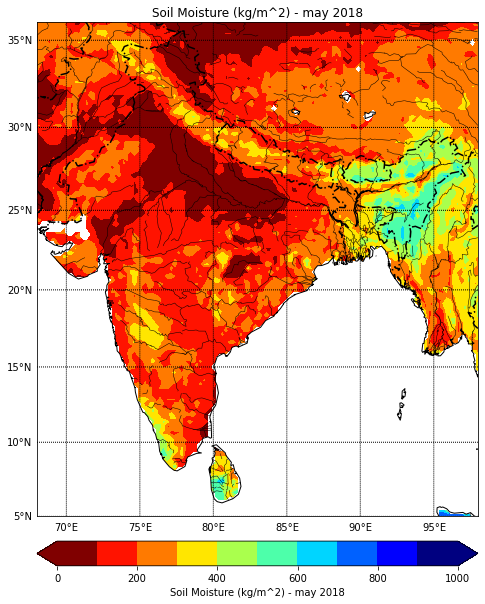

In [ ]:
get_map(soilm, 'RootMoist_inst', 220, 'Soil Moisture (kg/m^2) - ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_

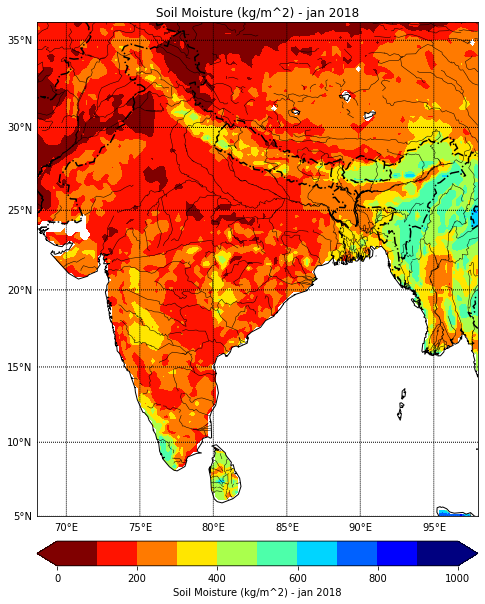

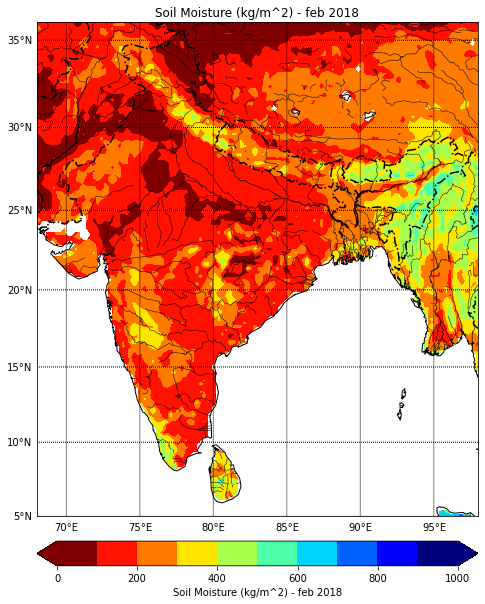

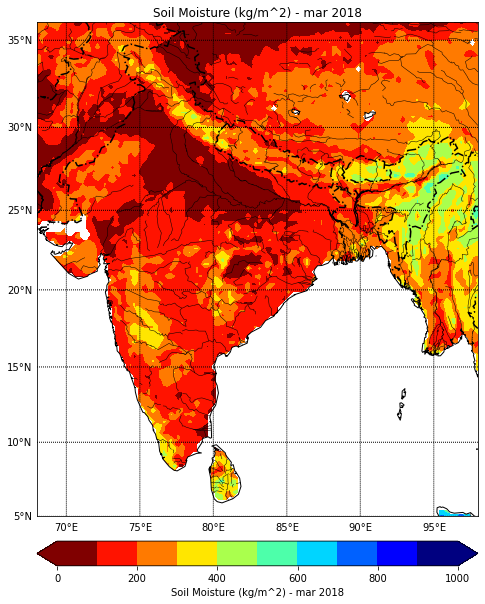

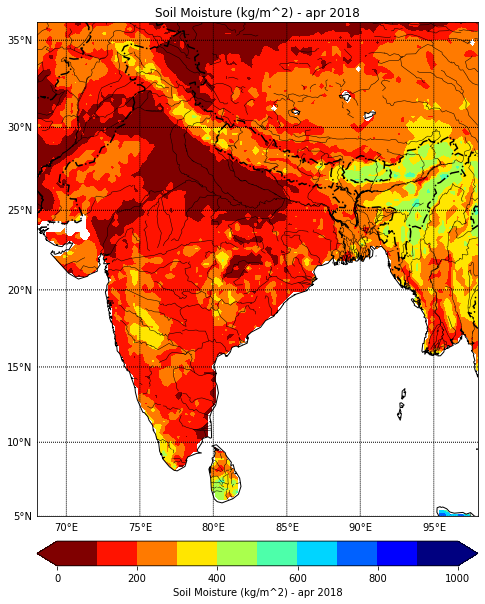

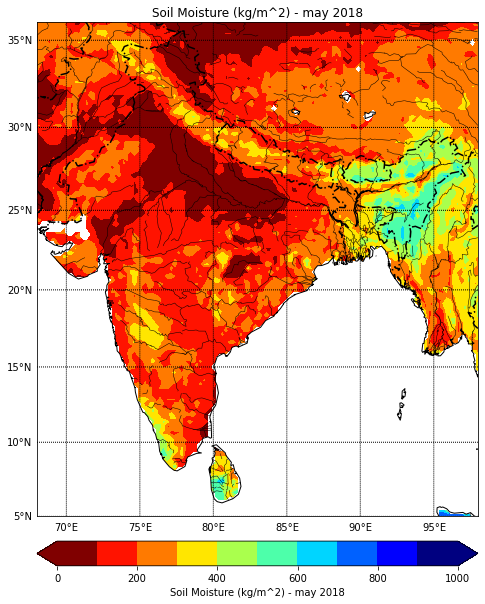

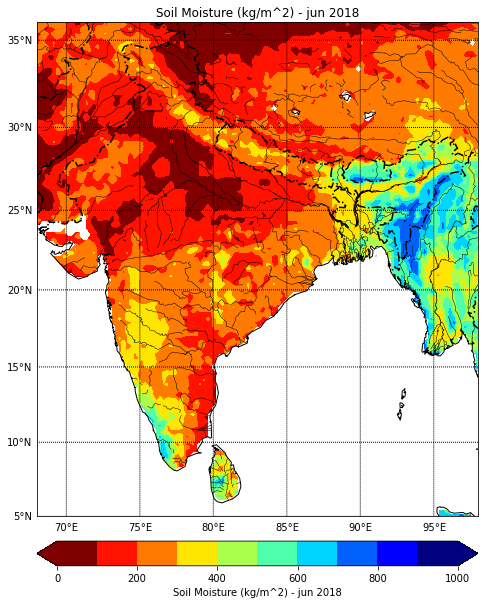

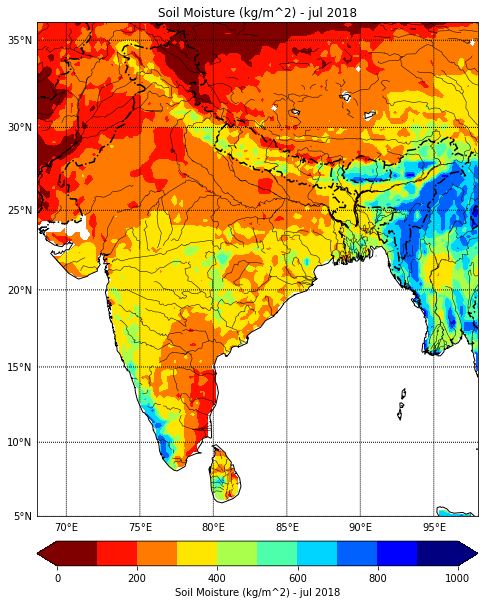

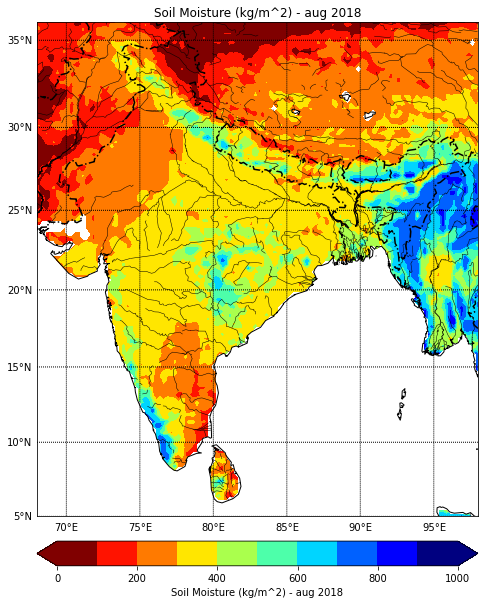

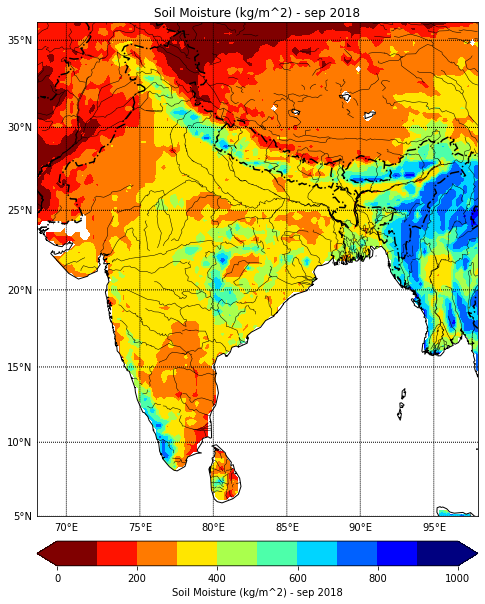

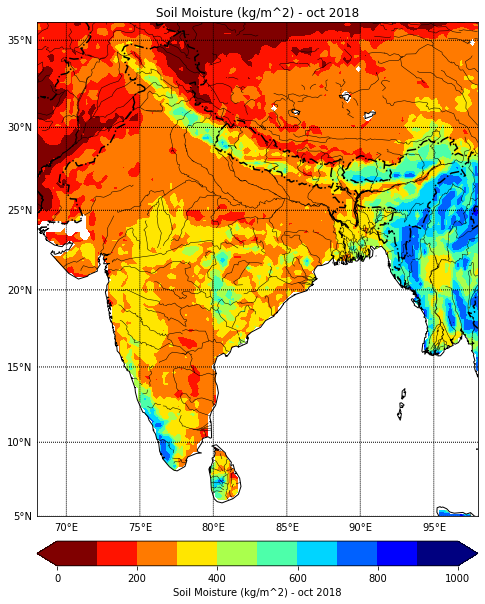

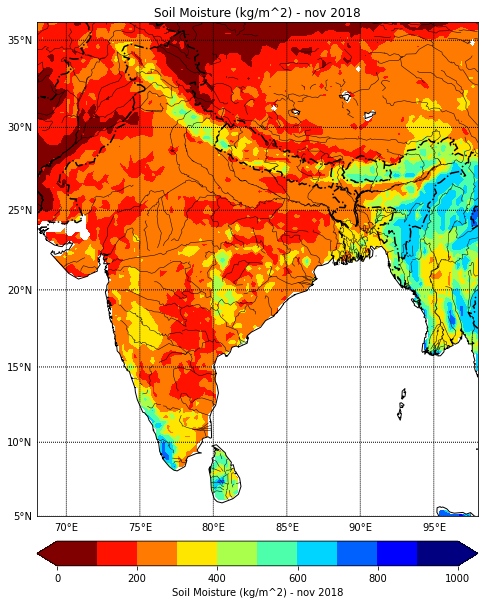

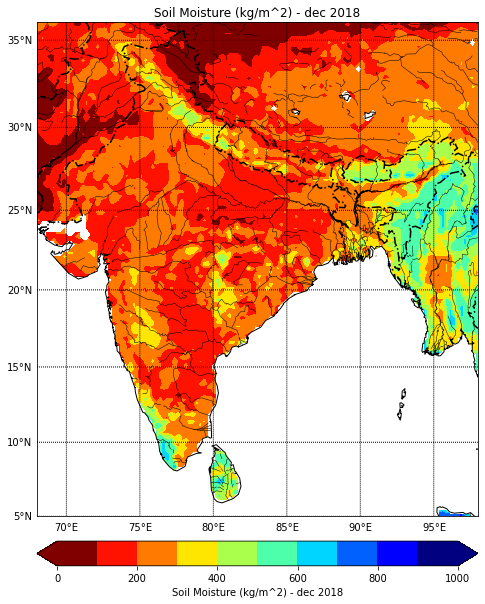

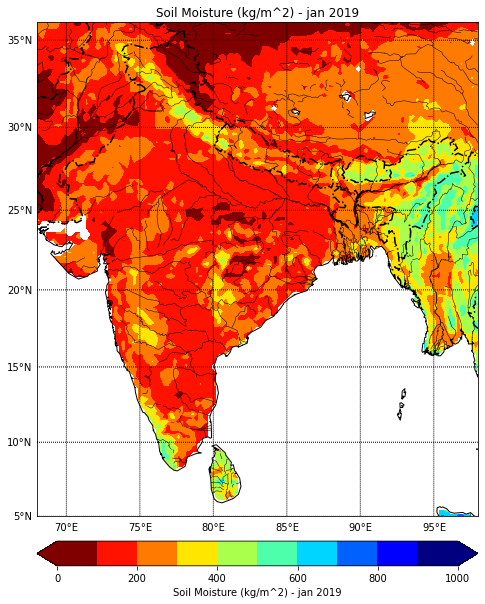

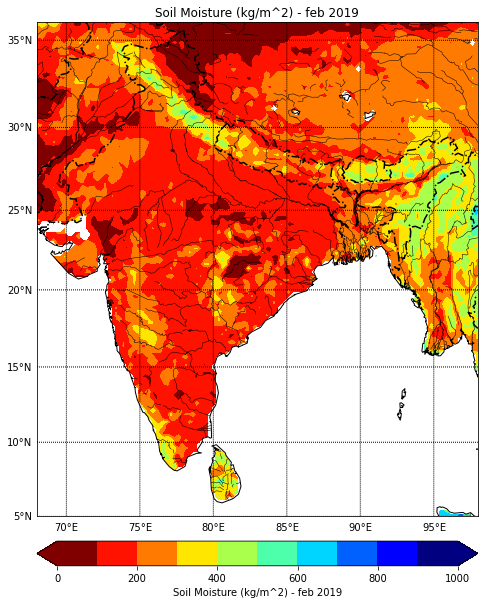

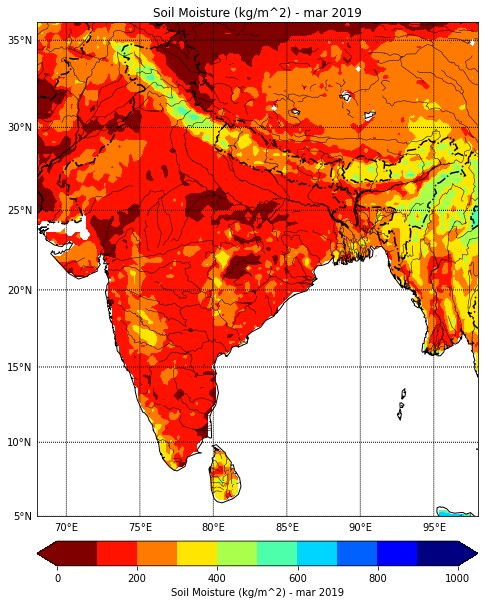

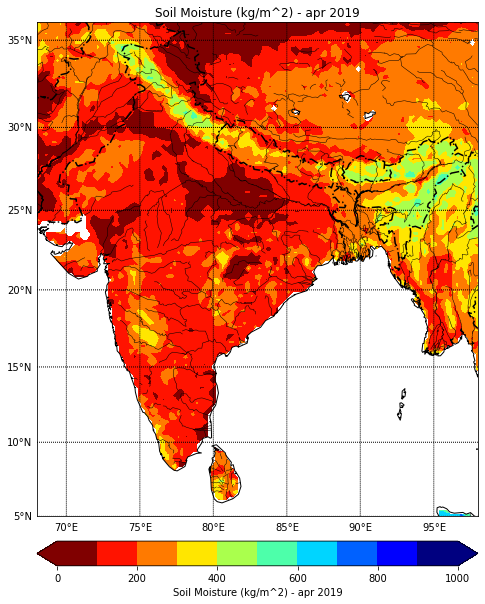

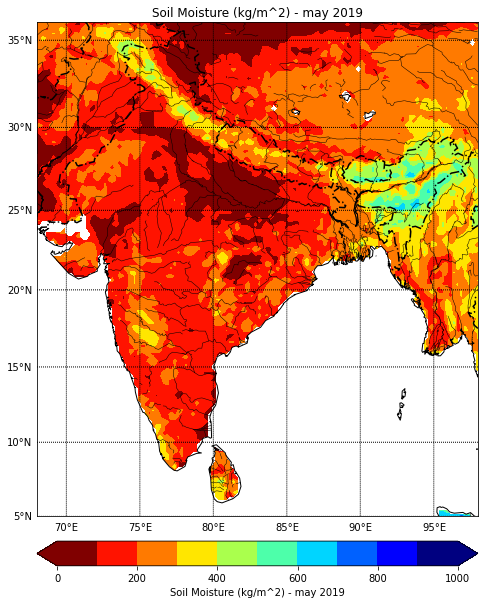

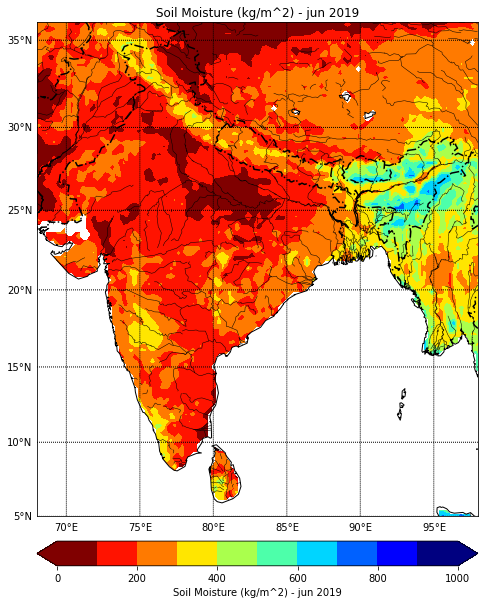

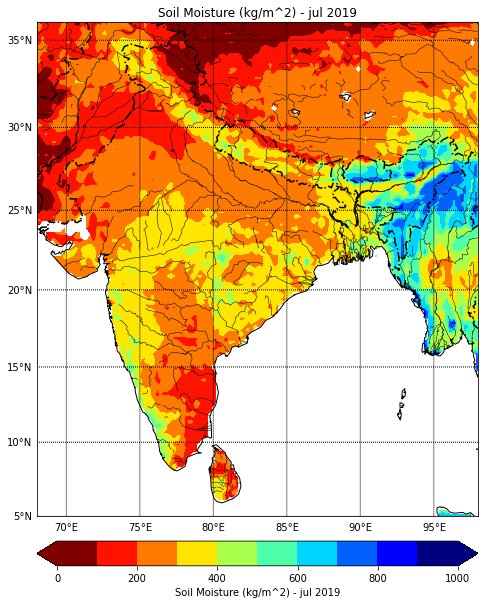

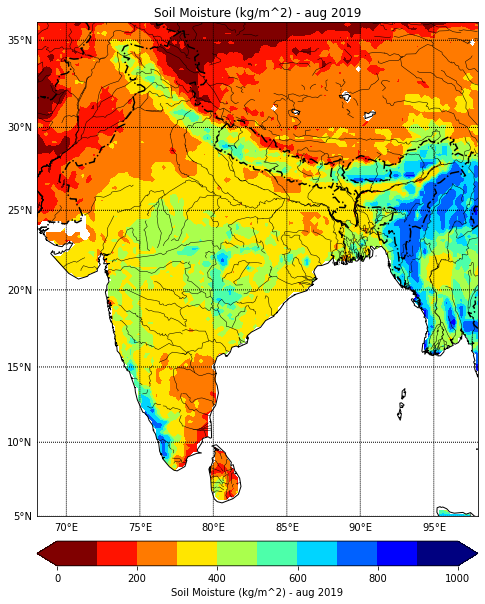

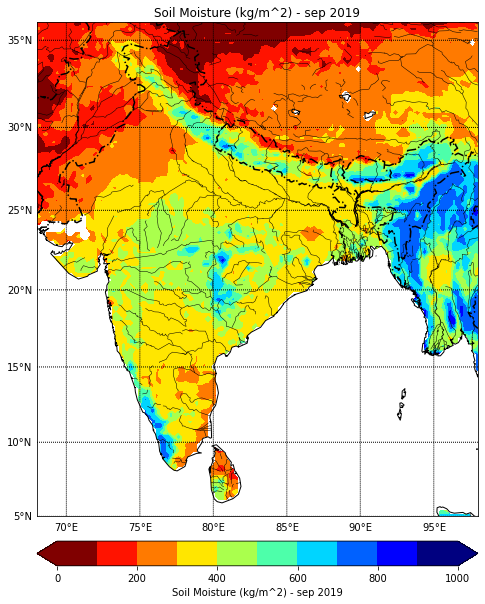

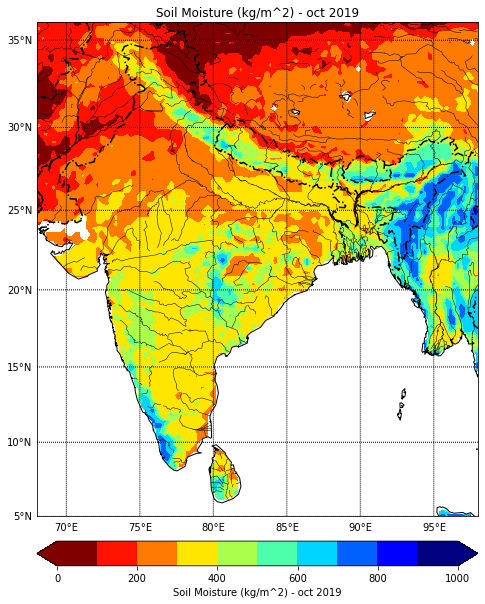

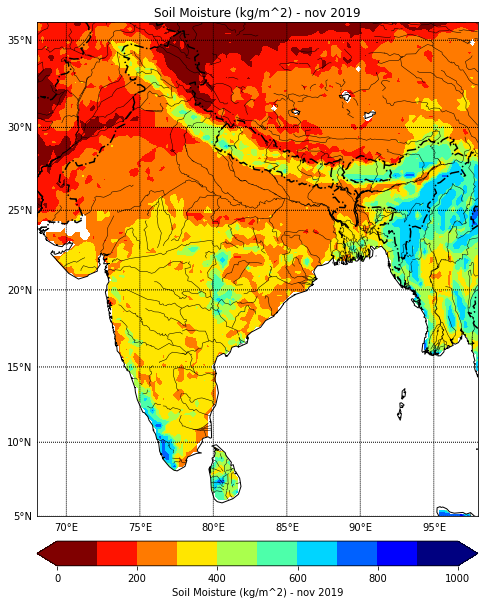

In [ ]:
for i in range(216,239):
  get_map(soilm, 'RootMoist_inst', i, 'Soil Moisture (kg/m^2) - ')

## Each variable's distribution

In [ ]:
ET = np.array(evap.variables['Evap_tavg'])*86400 #multiply to convert from kgm-2s-1 to mm/day
ET.shape
rain = np.array(prcp.variables['Rainf_f_tavg'])*86400 #multiply to convert from kgm-2s-1 to mm/day
rain.shape
run_off = np.array(runoff.variables['Qs_acc'])
run_off.shape
s_moist = np.array(soilm.variables['RootMoist_inst'])
s_moist.shape
t_air = np.array(temp.variables['Tair_f_inst'])[:254] #take the first 254 values since they are repeated
t_air.shape

(254, 144, 140)

In [ ]:
ET[ET<-1] = np.nan
rain[rain<-1] = np.nan
run_off[run_off==-9999] = np.nan
s_moist[s_moist==-9999] = np.nan
t_air[t_air==-9999] = np.nan

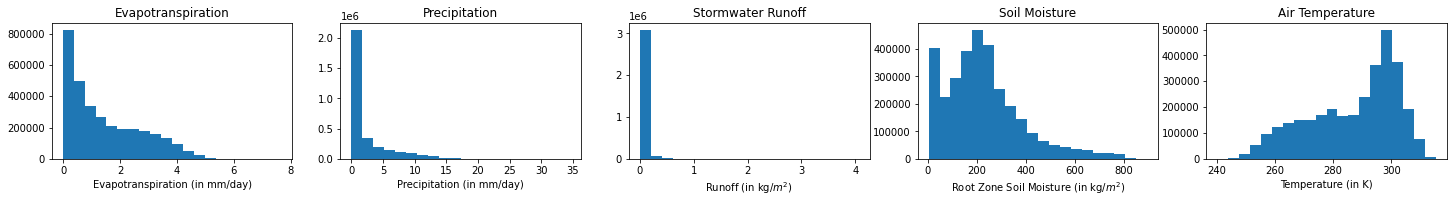

In [ ]:
fig, ax = plt.subplots(1,5,figsize=(25,2.5))

ax[0].hist(ET.flatten(),bins=20)
ax[0].set_title('Evapotranspiration')
ax[0].set_xlabel('Evapotranspiration (in mm/day)')

ax[1].hist(rain.flatten(),bins=20)
ax[1].set_title('Precipitation')
ax[1].set_xlabel('Precipitation (in mm/day)')

ax[2].hist(run_off.flatten(),bins=20)
ax[2].set_title('Stormwater Runoff')
ax[2].set_xlabel('Runoff (in kg/$m^2$)')

ax[3].hist(s_moist.flatten(),bins=20)
ax[3].set_title('Soil Moisture')
ax[3].set_xlabel('Root Zone Soil Moisture (in kg/$m^2$)')

ax[4].hist(t_air.flatten(),bins=20)
ax[4].set_title('Air Temperature')
ax[4].set_xlabel('Temperature (in K)')

plt.show()

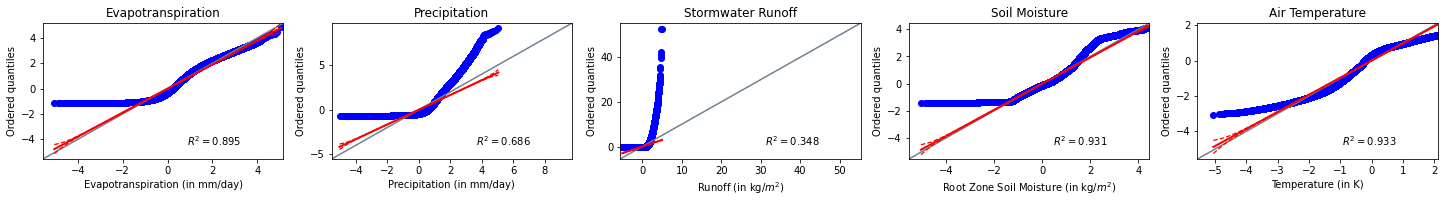

In [ ]:
fig, ax = plt.subplots(1,5,figsize=(25,2.5))

ax[0] = pg.qqplot(ET.flatten(),dist='norm',ax=ax[0])
ax[0].set_title('Evapotranspiration')
ax[0].set_xlabel('Evapotranspiration (in mm/day)')

ax[1] = pg.qqplot(rain.flatten(),dist='norm',ax=ax[1])
ax[1].set_title('Precipitation')
ax[1].set_xlabel('Precipitation (in mm/day)')

ax[2] = pg.qqplot(run_off.flatten(),dist='norm',ax=ax[2])
ax[2].set_title('Stormwater Runoff')
ax[2].set_xlabel('Runoff (in kg/$m^2$)')

ax[3] = pg.qqplot(s_moist.flatten(),dist='norm',ax=ax[3])
ax[3].set_title('Soil Moisture')
ax[3].set_xlabel('Root Zone Soil Moisture (in kg/$m^2$)')

ax[4] = pg.qqplot(t_air.flatten(),dist='norm',ax=ax[4])
ax[4].set_title('Air Temperature')
ax[4].set_xlabel('Temperature (in K)')

plt.show()

## Time Series Trends

In [ ]:
ET_avg = np.nanmean(ET,axis=(1,2))
rain_avg = np.nanmean(rain,axis=(1,2))
run_off_avg = np.nanmean(run_off,axis=(1,2))
s_moist_avg = np.nanmean(s_moist,axis=(1,2))
t_air_avg = np.nanmean(t_air,axis=(1,2))

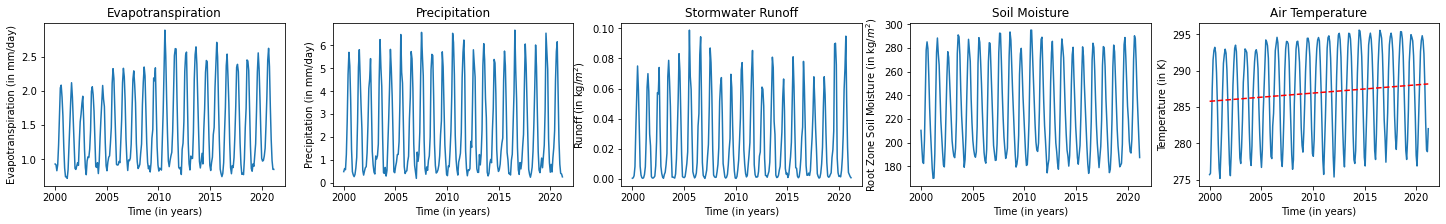

In [ ]:

fig, ax = plt.subplots(1,5,figsize=(25,3),sharex=True)

t = np.linspace(2000,2021+2/12,num=254)

ax[0].plot(t,ET_avg)
ax[0].set_title('Evapotranspiration')
ax[0].set_ylabel('Evapotranspiration (in mm/day)')
ax[0].set_xlabel('Time (in years)')

ax[1].plot(t,rain_avg)
ax[1].set_title('Precipitation')
ax[1].set_ylabel('Precipitation (in mm/day)')
ax[1].set_xlabel('Time (in years)')

ax[2].plot(t,run_off_avg)
ax[2].set_title('Stormwater Runoff')
ax[2].set_ylabel('Runoff (in kg/$m^2$)')
ax[2].set_xlabel('Time (in years)')

ax[3].plot(t,s_moist_avg)
ax[3].set_title('Soil Moisture')
ax[3].set_ylabel('Root Zone Soil Moisture (in kg/$m^2$)')
ax[3].set_xlabel('Time (in years)')

z = np.polyfit(t, t_air_avg, 1)
p = np.poly1d(z)

ax[4].plot(t,t_air_avg)
ax[4].plot(t,p(t),'r--')
ax[4].set_title('Air Temperature')
ax[4].set_ylabel('Temperature (in K)')
ax[4].set_xlabel('Time (in years)')

plt.show()

## Anomalies

In [ ]:
def get_anomaly_ts(var_ts):
  var_avg = np.zeros(12)
  var_num = np.zeros(12)
  for i in range(len(var_ts)):
    var_avg[i%12] = (var_avg[i%12]*var_num[i%12] + var_ts[i])/(var_num[i%12] + 1)
    var_num[i%12] = var_num[i%12] + 1
  
  var_std = np.zeros(12)
  for i in range(len(var_ts)):
    var_std[i%12] = var_std[i%12] + (var_ts[i] - var_avg[i%12])**2
  
  var_std = (var_std/var_num)**0.5

  var_ano = np.zeros(len(var_ts))
  for i in range(len(var_ts)):
    var_ano[i] = (var_ts[i]-var_avg[i%12])/var_std[i%12]
  
  return var_avg, var_std, var_ano

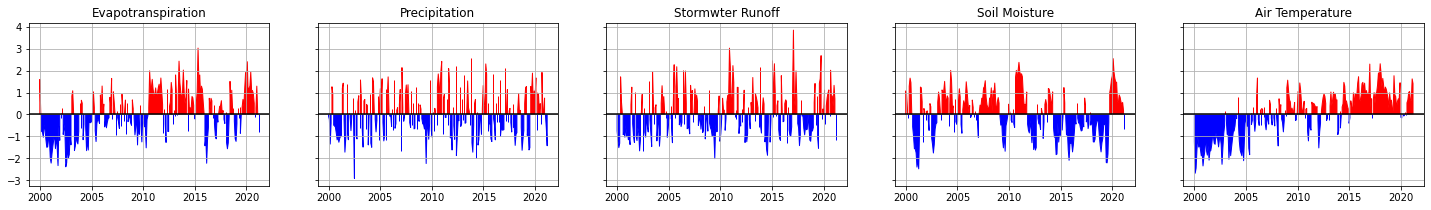

In [ ]:
data = [ET_avg,rain_avg,run_off_avg,s_moist_avg,t_air_avg]
titles= ['Evapotranspiration','Precipitation','Stormwter Runoff','Soil Moisture','Air Temperature']

fig,ax = plt.subplots(1,5,figsize=(25,3),sharey=True)
for i in range(5):
  var_avg, var_std, var_ano = get_anomaly_ts(data[i])

  ax[i].fill_between(t,var_ano,where=var_ano>0,color='r')
  ax[i].fill_between(t,var_ano,where=var_ano<0,color='b')
  ax[i].axhline(y=0,color='k')
  ax[i].set_title(titles[i])
  ax[i].grid(True)

plt.show()

## Flood and Drought months
- Drought - June 2009 (113)
- Flood - Jan 2020 (240)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


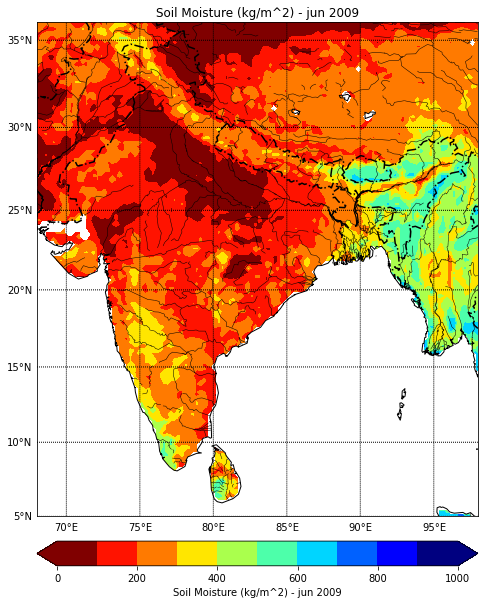

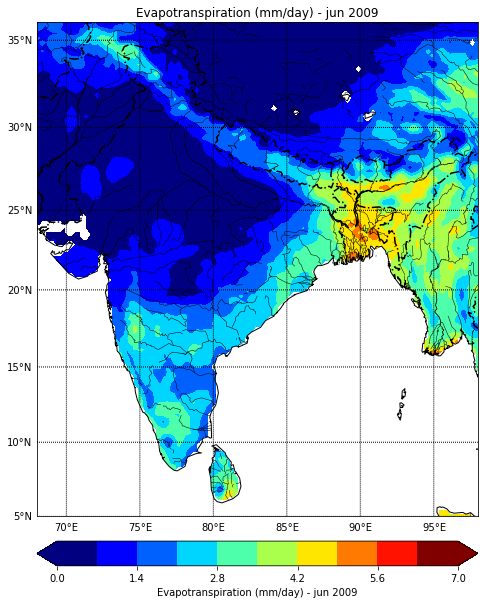

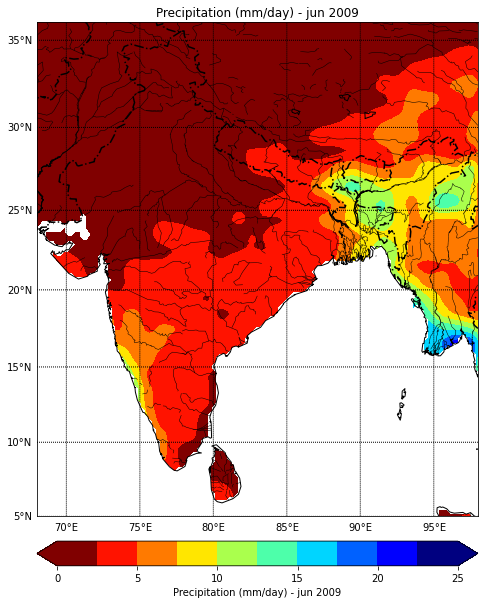

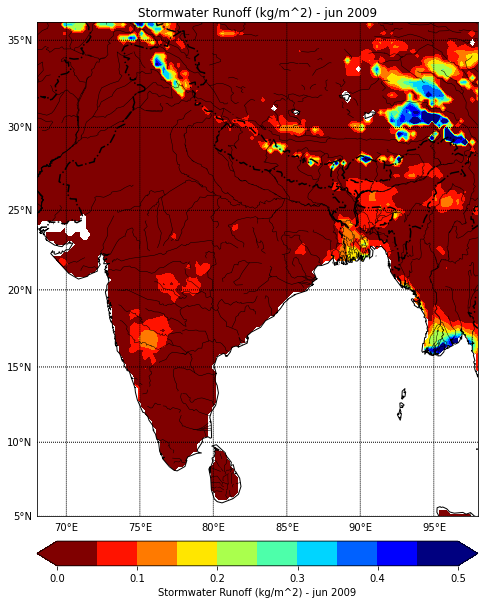

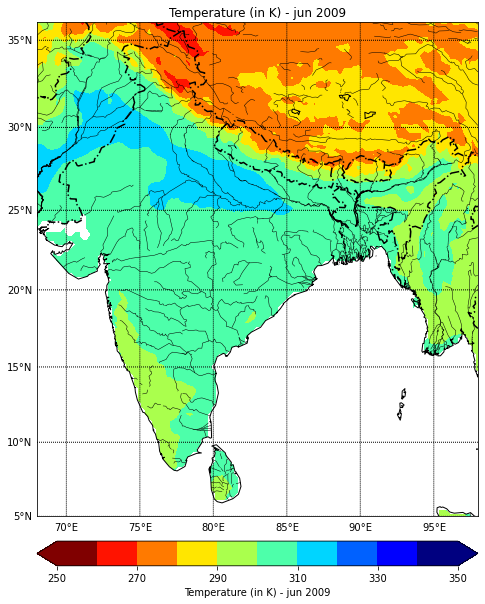

In [ ]:
# drought
levels = np.linspace(0,1000,num=11)
get_map(soilm, 'RootMoist_inst', levels, 113, 'Soil Moisture (kg/m^2) - ')

levels = np.linspace(0,7,num=11)
get_map(evap, 'Evap_tavg', levels, 113, 'Evapotranspiration (mm/day) - ',86400,'jet')

levels = np.linspace(0,25,num=11)
get_map(prcp, 'Rainf_f_tavg', levels, 113, 'Precipitation (mm/day) - ',86400)

levels = np.linspace(0,0.5,num=11)
get_map(runoff, 'Qs_acc', levels, 113, 'Stormwater Runoff (kg/m^2) - ')

levels = np.linspace(250,350,num=11)
get_map(temp, 'Tair_f_inst', levels, 113, 'Temperature (in K) - ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


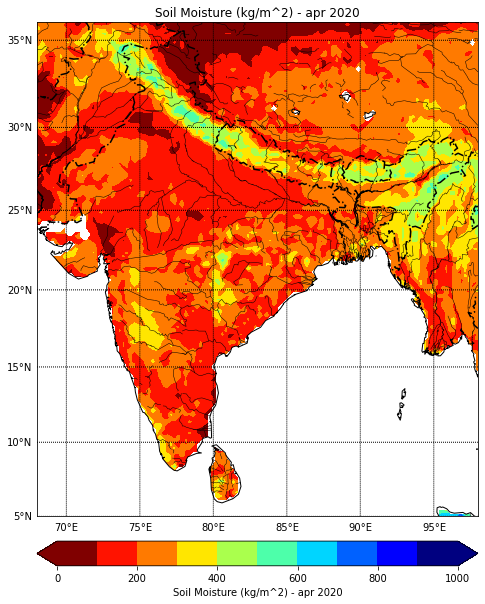

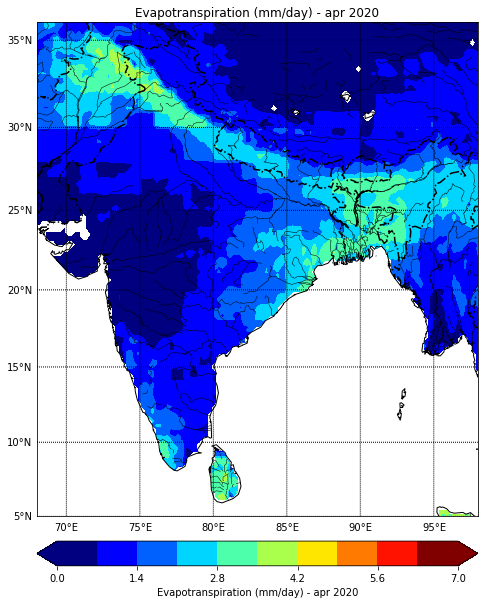

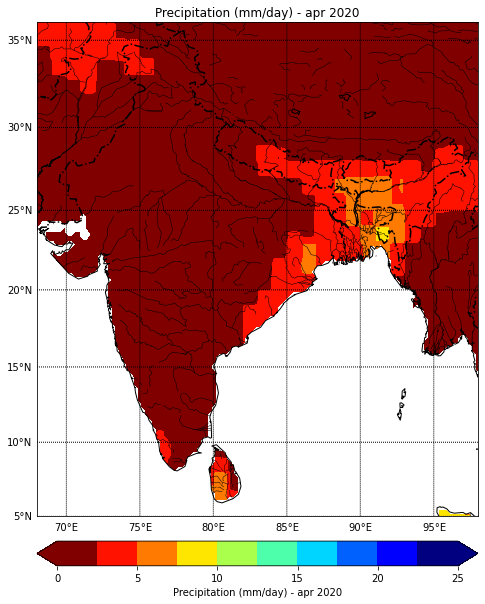

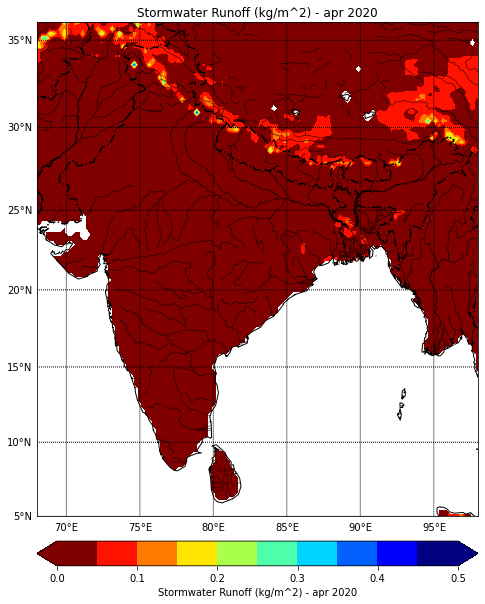

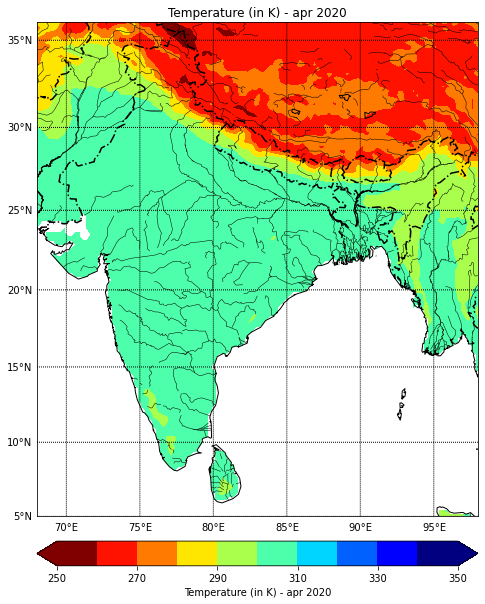

In [ ]:
# flood
levels = np.linspace(0,1000,num=11)
get_map(soilm, 'RootMoist_inst', levels, 243, 'Soil Moisture (kg/m^2) - ')

levels = np.linspace(0,7,num=11)
get_map(evap, 'Evap_tavg', levels, 243, 'Evapotranspiration (mm/day) - ',86400,'jet')

levels = np.linspace(0,25,num=11)
get_map(prcp, 'Rainf_f_tavg', levels, 243, 'Precipitation (mm/day) - ',86400)

levels = np.linspace(0,0.5,num=11)
get_map(runoff, 'Qs_acc', levels, 243, 'Stormwater Runoff (kg/m^2) - ')

levels = np.linspace(250,350,num=11)
get_map(temp, 'Tair_f_inst', levels, 243, 'Temperature (in K) - ')

## Seasonal Cycle

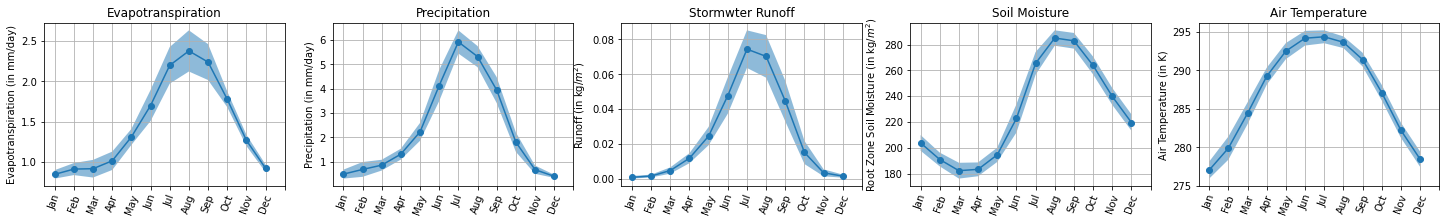

In [ ]:
data = [ET_avg,rain_avg,run_off_avg,s_moist_avg,t_air_avg]
titles= ['Evapotranspiration','Precipitation','Stormwter Runoff','Soil Moisture','Air Temperature']
ylabels = ['Evapotranspiration (in mm/day)','Precipitation (in mm/day)','Runoff (in kg/$m^2$)','Root Zone Soil Moisture (in kg/$m^2$)','Air Temperature (in K)']
xlabels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig,ax = plt.subplots(1,5,figsize=(25,3))
for i in range(5):
  var_avg, var_std, var_ano = get_anomaly_ts(data[i])
  ax[i].plot(var_avg,'o-')
  ax[i].fill_between(np.linspace(0,11,num=12),var_avg-var_std, var_avg+var_std,alpha=0.5)
  ax[i].set_title(titles[i])
  ax[i].set_ylabel(ylabels[i])
  ax[i].set_xticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12])
  ax[i].set_xticklabels(xlabels,rotation=70)
  ax[i].grid(True)

plt.show()

## Coorelation

In [ ]:
df_data = np.array(data).T
df_data.shape

(254, 5)

In [ ]:
c1 = pd.DataFrame(df_data,columns=['ET','Rain','Runoff','Soil Moisture','Air Temp.']).corr(method = 'pearson')
c2 = pd.DataFrame(df_data,columns=['ET','Rain','Runoff','Soil Moisture','Air Temp.']).corr(method = 'kendall')

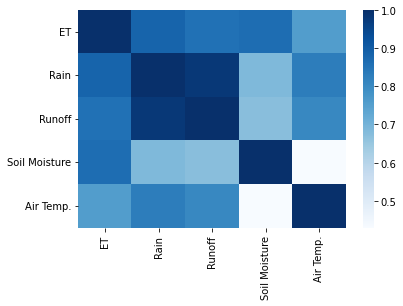

In [ ]:
sb.heatmap(c1,cmap='Blues')
plt.show()

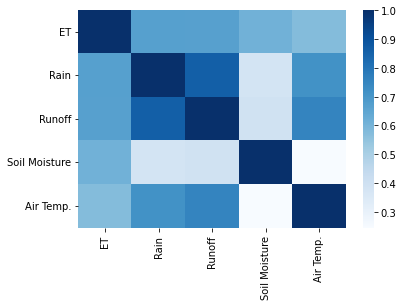

In [ ]:
sb.heatmap(c2,cmap='Blues')
plt.show()

## Make dataframes

In [ ]:
def make_dataframe(data,var,var1):
  lats = data.variables['lat'][:]  # extract/copy the data
  lons = data.variables['lon'][:]
  time = data.variables['time'][:]
  ET = data.variables[var][:]

  time,lats,lons= np.meshgrid(time,lats,lons)

  d = {'time':time.flatten(), 'lat':lats.flatten(), 'lon':lons.flatten(), var1:ET.flatten()}

  df = pd.DataFrame(data=d)

  return df


In [ ]:
df_evap = make_dataframe(evap,'Evap_tavg','ET')
df_prcp = make_dataframe(prcp,'Rainf_f_tavg','prcp')
df_runoff = make_dataframe(runoff,'Qs_acc','runoff')
df_soilm = make_dataframe(soilm,'RootMoist_inst','soilm')
df_temp = make_dataframe(temp,'Tair_f_inst','temp')

In [ ]:
df_evap

time     lat     lon            ET
0           0.0   4.125  65.125           NaN
1           0.0   4.125  65.375           NaN
2           0.0   4.125  65.625           NaN
3           0.0   4.125  65.875           NaN
4           0.0   4.125  66.125           NaN
...         ...     ...     ...           ...
5120635  7702.0  39.875  98.875  7.836516e-07
5120636  7702.0  39.875  99.125  9.113301e-07
5120637  7702.0  39.875  99.375  9.595444e-07
5120638  7702.0  39.875  99.625  9.412408e-07
5120639  7702.0  39.875  99.875  9.372230e-07

[5120640 rows x 4 columns]

In [ ]:
new_df = pd.merge(df_evap, df_prcp,  how='left', left_on=['time','lat','lon'], right_on = ['time','lat','lon'])
new_df = pd.merge(new_df, df_runoff,  how='left', left_on=['time','lat','lon'], right_on = ['time','lat','lon'])
new_df = pd.merge(new_df, df_soilm,  how='left', left_on=['time','lat','lon'], right_on = ['time','lat','lon'])
new_df = pd.merge(new_df, df_temp,  how='left', left_on=['time','lat','lon'], right_on = ['time','lat','lon'])

In [ ]:
df_temp.iloc[0:5120640]

time     lat     lon        temp
0           0.0   4.125  65.125         NaN
1           0.0   4.125  65.375         NaN
2           0.0   4.125  65.625         NaN
3           0.0   4.125  65.875         NaN
4           0.0   4.125  66.125         NaN
...         ...     ...     ...         ...
5120635  7702.0  21.875  98.875  275.176880
5120636  7702.0  21.875  99.125  275.243774
5120637  7702.0  21.875  99.375  275.152466
5120638  7702.0  21.875  99.625  274.535492
5120639  7702.0  21.875  99.875  274.536896

[5120640 rows x 4 columns]

In [ ]:
new_df

time     lat     lon            ET      prcp        runoff  \
0            0.0   4.125  65.125           NaN       NaN           NaN   
1            0.0   4.125  65.125           NaN       NaN           NaN   
2            0.0   4.125  65.375           NaN       NaN           NaN   
3            0.0   4.125  65.375           NaN       NaN           NaN   
4            0.0   4.125  65.625           NaN       NaN           NaN   
...          ...     ...     ...           ...       ...           ...   
10241275  7702.0  39.875  99.375  9.595444e-07  0.000002  1.517857e-06   
10241276  7702.0  39.875  99.625  9.412408e-07  0.000002  8.035714e-07   
10241277  7702.0  39.875  99.625  9.412408e-07  0.000002  8.035714e-07   
10241278  7702.0  39.875  99.875  9.372230e-07  0.000002  4.017857e-07   
10241279  7702.0  39.875  99.875  9.372230e-07  0.000002  4.017857e-07   

              soilm        temp  
0               NaN         NaN  
1               NaN  281.772583  
2               NaN         NaN  
3               NaN  281.402069  
4               NaN         NaN  
...             ...         ...  
10241275  11.297554  275.152466  
10241276  11.148544  295.697510  
10241277  11.148544  274.535492  
10241278  10.853599  297.095520  
10241279  10.853599  274.536896  

[10241280 rows x 8 columns]

In [ ]:
from datetime import datetime, date, timedelta
from tqdm import tqdm

In [ ]:
d0 = date(2000, 1, 1)
new_dates = []
for idx, row in tqdm(new_df.iterrows(), total=new_df.shape[0]):
  delta = timedelta(days=row['time'])
  new_dates.append(d0 + delta)
new_df['date'] = new_dates

100%|██████████| 10241280/10241280 [08:40<00:00, 19693.34it/s]


In [ ]:
new_df.to_csv('merged_dataframe.csv')

In [ ]:
new_df[(new_df['date']-date(2000,1,1)<timedelta(days=1))]

time     lat     lon        ET      prcp    runoff       soilm  \
0          0.0   4.125  65.125       NaN       NaN       NaN         NaN   
1          0.0   4.125  65.125       NaN       NaN       NaN         NaN   
2          0.0   4.125  65.375       NaN       NaN       NaN         NaN   
3          0.0   4.125  65.375       NaN       NaN       NaN         NaN   
4          0.0   4.125  65.625       NaN       NaN       NaN         NaN   
...        ...     ...     ...       ...       ...       ...         ...   
10170435   0.0  39.875  99.375  0.000037  0.000003  0.000062  514.923706   
10170436   0.0  39.875  99.625  0.000030  0.000003  0.000067  455.297516   
10170437   0.0  39.875  99.625  0.000030  0.000003  0.000067  455.297516   
10170438   0.0  39.875  99.875  0.000020  0.000004  0.000037  125.827858   
10170439   0.0  39.875  99.875  0.000020  0.000004  0.000037  125.827858   

                temp        date  
0                NaN  2000-01-01  
1         281.772583  2000-01-01  
2                NaN  2000-01-01  
3         281.402069  2000-01-01  
4                NaN  2000-01-01  
...              ...         ...  
10170435  295.380859  2000-01-01  
10170436  290.929993  2000-01-01  
10170437  296.538147  2000-01-01  
10170438  292.508667  2000-01-01  
10170439  297.335571  2000-01-01  

[40320 rows x 9 columns]

In [ ]:
new_df.describe()

time           lat           lon            ET          prcp  \
count  1.024128e+07  1.024128e+07  1.024128e+07  6.366256e+06  6.382004e+06   
mean   3.850043e+03  2.200001e+01  8.250014e+01  1.681247e-05  2.664350e-05   
std    2.231766e+03  1.039205e+01  1.010337e+01  1.478778e-05  4.029995e-05   
min    0.000000e+00  4.125000e+00  6.512500e+01 -2.122004e-07  0.000000e+00   
25%    1.917000e+03  1.306250e+01  7.381250e+01  4.033498e-06  1.841936e-06   
50%    3.849500e+03  2.200000e+01  8.250000e+01  1.210209e-05  8.035714e-06   
75%    5.783000e+03  3.093750e+01  9.118750e+01  2.769456e-05  3.261667e-05   
max    7.702000e+03  3.987500e+01  9.987500e+01  8.884786e-05  3.995612e-04   

             runoff         soilm          temp  
count  6.366256e+06  6.366256e+06  6.382004e+06  
mean   2.495177e-02  2.276286e+02  2.869690e+02  
std    7.673497e-02  1.599753e+02  1.523452e+01  
min    0.000000e+00  2.571351e+00  2.401413e+02  
25%    1.520161e-05  1.179652e+02  2.754014e+02  
50%    7.382917e-04  2.077459e+02  2.916572e+02  
75%    1.321803e-02  3.032443e+02  2.992905e+02  
max    4.064369e+00  8.965796e+02  3.153853e+02

In [ ]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [ ]:
%ls

 Apurva_Climate.ipynb
 cordex-climate-data.ipynb
 CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_v02.nc
 gif_img/
 India/
'may 2018.png'
 merged_dataframe.csv
 mid-term.ipynb
 Raw_data_downloaded/
 Raw_data_downloaded.zip
 stat650-midterm.ipynb
 Untitled.ipynb


In [ ]:
new_df = pd.read_csv('merged_dataframe.csv')

In [ ]:
corr_data = new_df.loc[:, ["ET",	"prcp",	"runoff",	"soilm",	"temp"]]
corr_data

ET      prcp        runoff      soilm       temp
0                  NaN       NaN           NaN        NaN        NaN
1                  NaN       NaN           NaN        NaN  281.77258
2                  NaN       NaN           NaN        NaN        NaN
3                  NaN       NaN           NaN        NaN  281.40207
4                  NaN       NaN           NaN        NaN        NaN
...                ...       ...           ...        ...        ...
10241275  9.595444e-07  0.000002  1.517857e-06  11.297554  275.15247
10241276  9.412408e-07  0.000002  8.035714e-07  11.148544  295.69750
10241277  9.412408e-07  0.000002  8.035714e-07  11.148544  274.53550
10241278  9.372230e-07  0.000002  4.017857e-07  10.853599  297.09552
10241279  9.372230e-07  0.000002  4.017857e-07  10.853599  274.53690

[10241280 rows x 5 columns]

In [ ]:
c1 = corr_data.corr(method = 'pearson')
c2 = corr_data.corr(method = 'kendall')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


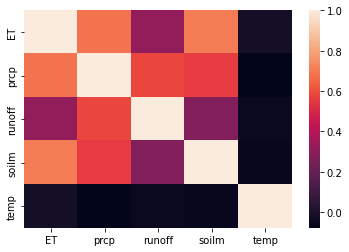

In [ ]:
plott = sb.heatmap(c1)
plt.show()